# 인천광역시의 연령 및 직업별 소비 데이터 분석 (202121859 이을호)

===================================================================================================================

# 1. 문제 정의

본 과제에서는 인천광역시에서의 사업을 진행한다는 가정하에 소비자 타겟을 정하기 위한 정보 분석을 위해 가장 최근 자료인 2020년도 6월 데이터를 기반으로 분석을 진행한다.

음식점, 옷가게 등 점포 사업을 시작하기 위해서는 해당 지역의 인구 분포 조사 역시 중요하지만 가장 중요한 것은 선택한 사업 아이템의 주요 고객층의 수요를 분석하는 것이 중요하다.

연령대 별 소비 금액의 수준을 알고 직업별 소비 수준을 확인 가능하면 이 데이터를 기반으로 고객층을 타겟으로 하여 마케팅 및 상품 개발 및 소싱에도 참고할 자료로 사용이 가능하다.

소비에 대한 비율은 경제활동인구의 주요 연령대인 20 ~ 50대 사이에서 확인 될 것으로 보이며, 남녀 성비에 따른 데이터를 확인 후 사업 아이템 선정에 더 자세한 정보를 받을 수 있을 것으로 예측한다.

20대의 경우에는 비경제활동 인구가 많기에 직업이 없는 인구의 소비도 많을 것이며, 30대, 40대의 경우에는 어느 정도 경제활동을 하기 때문에 여러 직군의 소비 수준을 확인하여 (남/여)의 비율을 측정하여 사업 아이템의 고객층을 선정하는 방향에 사용 가능하다.

우선 데이터 분석은 하단과 같이 진행을 한다.

- 1. 연령별 소비 인구의 분포를 확인 후 가장 높은 3개의 연령을 선택

- 2. 상자그림 및 heatmap을 통한 속성간의 상관관계를 확인 후 사용할 속성을 선택함

- 3. K-means에 상단에서 선택한 속성을 dataframe을 통해 클러스터링 분석 진행 (유형은 20, 30, 40대 이기에 nclusters = 3으로 지정)

- 4. 실루엣 점수 확인

- 5. 엘보우 방법을 통한 최적의 클러스터 수 및 K 결정

- 6. K값을 통해 알고리즘 초기화 및 각 클러스터링 수행 (결과 분석)

===================================================================================================================

## 작업 환경


- Python Version : Python 3.10.13

- Edit date : 2024/04/25

===================================================================================================================

## 2. 데이터 선정

- 공공데이터 포탈 : https://www.data.go.kr/data/15076578/fileData.do

상단의 데이터는 인천광역시 소비 데이터로 상단에 정의한 소비자 타겟 선정을 위한 클러스터링 자료로 활용한다.

===================================================================================================================

# 3. 데이터 전처리 진행 (결측치 처리 및 정규화 진행)

In [1]:
# seaborn 설치

%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# dataframe을 다룰 pandas와 시각화를 위한 matplotlib.pyplot을 import

import matplotlib.pyplot as plt
import pandas as pd

공공데이터 포탈의 csv 데이터는 CP949의 형태로 입력되어 있어 pandas로 encoding을 CP949로 변경하여 데이터를 읽어들인다.

- 데이터의 상세 정보 설명

    ※ 인구단위: 명/ 금액단위: 천원

- 성별 

    -> 0 : 전체 , 1 : 남성 , 2 : 여성

- 직업구분 

    ->  0 : 전체, 1 : 자영업자, 2 : 급여소득자(상장), 3 : 급여소득자(비상장), 4 : 비경제활동인구

- 최근 12개월신용 및 체크카드이용 금액합계

    -> [최근12개월 전체 신용카드  및 체크카드의 신용판매 이용금액 합계(현금서비스 제외)// 단위: 천원]

- 최근 12개월 전체체크카드 이용금액합계
    
    -> [최근12개월 전체 체크카드 이용금액  합계// 단위: 천원]

- 최근 12개월 해외이용금액합계
    
    -> [최근12개월 전체 신용카드 해외  신용판매 이용금액 합계(현금서비스 제외)// 단위: 천원]

- 최근 12개월 평균신용  및 체크카드이용 금액합계

    -> [최근12개월 (신용카드+체크카드)  이용금액 >0 인 인구의 (신용카드+체크카드) 신용판매 이용금액 평균(현금서비스 제외)// 단위: 천원]

In [3]:
# 인천광역시의 6월 소비 데이터 CP949로 인코딩 후 출력

# 데이터에 해당하는 연령을 알 수 없는 0세는 제거 후 df를 출력함
df = pd.read_csv("/workspaces/ml202401-midterm-LeeEulHo/incheon_2006.csv", encoding="CP949")

# 코드 내에서 영문으로 변수명의 확인이 가능하도록 행의 이름을 바꿔줌 (파파고 활용)
df.rename(columns={
    '기준년월': 'Year_Month_Date',
    '행정동코드': 'Administrative dong code',
    '시도명': 'sido',
    '시군구명': 'City, county and district names',
    '성별': 'sex',
    '연령별': 'age',
    '직업구분': 'job',
    '분위구분': 'Quartile classification',
    '최근12개월신용및체크카드이용금액합계': 'Total of credit and debit card of last 12 months',
    '최근12개월전체체크카드이용금액합계': 'Total of debit card last 12 months',
    '최근12개월해외이용금액합계': 'Total of overseas use last 12 months',
    '최근12개월평균신용및체크카드이용금액합계': 'Average of credit and debit card of last 12 months',
    '최근12개월평균체크카드이용금액': 'Average of debit card of last 12 months',
    '최근12개월평균해외이용금액': 'Average of overseas use last 12 months',
    '최근12개월신용및체크카드이용인구수': 'Number of credit and debit card users last 12 months',
    '최근12개월체크카드이용인구수': 'Number of debit card users last 12 months',
    '최근12개월해외이용인구수': 'Number of overseas use last 12 months',
    '최근1개월신용및체크카드이용금액합계': 'Total of credit and debit card of last 1 months',
    '최근1개월체크카드이용금액합계': 'Total of debit card last 1 months',
    '최근1개월해외신판이용금액합계': 'Total of overseas new products use last 1 months',
    '최근1개월평균신용및체크카드이용금액': 'Average of credit and debit card of last 1 months',
    '최근1개월평균체크카드이용금액': 'Average of debit card of last 1 months',
    '최근1개월평균해외이용금액': 'Average of overseas use last 1 months',
    '최근1개월신용및체크카드이용인구수': 'Number of credit and debit card users last 1 months',
    '최근1개월체크카드이용인구수': 'Number of debit card users last 1 months',
    '최근1개월해외이용인구수': 'Number of overseas use last 1 months'
}, inplace=True)

df = df[df["age"] >= 10]
df = df[df["sex"] >= 1]
df.head()

,Year_Month_Date,Administrative dong code,sido,"City, county and district names",sex,age,job,Quartile classification,Total of credit and debit card of last 12 months,Total of debit card last 12 months,...,Number of overseas use last 12 months,Total of credit and debit card of last 1 months,Total of debit card last 1 months,Total of overseas new products use last 1 months,Average of credit and debit card of last 1 months,Average of debit card of last 1 months,Average of overseas use last 1 months,Number of credit and debit card users last 1 months,Number of debit card users last 1 months,Number of overseas use last 1 months
2,2020-06-30,2814000000,인천광역시,동구,1,70,4,3,1077528.0,210527.0,...,4,99124.0,25705.0,NaN,597.0,357.0,NaN,166,72,1
4,2020-06-30,2814000000,인천광역시,동구,1,70,3,6,222765.0,23867.0,...,0,16328.0,549.0,NaN,960.0,183.0,NaN,17,3,0
5,2020-06-30,2820000000,인천광역시,남동구,1,50,4,6,34496892.0,11867494.0,...,196,3605288.0,1304013.0,4979.0,1137.0,584.0,178.0,3171,2233,28
9,2020-06-30,2814000000,인천광역시,동구,1,70,0,6,1032618.0,132160.0,...,7,79340.0,11247.0,NaN,882.0,288.0,NaN,90,39,0
10,2020-06-30,2820000000,인천광역시,남동구,1,50,1,10,99953705.0,9824423.0,...,477,7862520.0,743615.0,28833.0,5331.0,1217.0,365.0,1475,611,79


In [4]:
# 데이터의 총량 및 정보 확인

df.info()

# 데이터의 정보를 확인하면 총 26개의 속성으로 나뉨을 확인 가능하다

<class 'pandas.core.frame.DataFrame'>
Index: 8504 entries, 2 to 14731
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Year_Month_Date                                       8504 non-null   object 
 1   Administrative dong code                              8504 non-null   int64  
 2   sido                                                  8504 non-null   object 
 3   City, county and district names                       8504 non-null   object 
 4   sex                                                   8504 non-null   int64  
 5   age                                                   8504 non-null   int64  
 6   job                                                   8504 non-null   int64  
 7   Quartile classification                               8504 non-null   int64  
 8   Total of credit and debit card of last 12 months      7029 non

In [5]:
# 전처리에 앞서 결측치 여부 확인

df.isnull().sum()

Year_Month_Date                                            0
Administrative dong code                                   0
sido                                                       0
City, county and district names                            0
sex                                                        0
age                                                        0
job                                                        0
Quartile classification                                    0
Total of credit and debit card of last 12 months        1475
Total of debit card last 12 months                      1483
Total of overseas use last 12 months                    2583
Average of credit and debit card of last 12 months      1475
Average of debit card of last 12 months                 1483
Average of overseas use last 12 months                  2583
Number of credit and debit card users last 12 months       0
Number of debit card users last 12 months                  0
Number of overseas use l

In [6]:
# 결측치 제거 후 데이터 확인

df = df.dropna(axis=0) # 결측치가 존재하는 데이터는 제거 (수치값 계산 및 시각화에 방해될 가능성이 있기 때문임)
df.isnull().sum()

Year_Month_Date                                         0
Administrative dong code                                0
sido                                                    0
City, county and district names                         0
sex                                                     0
age                                                     0
job                                                     0
Quartile classification                                 0
Total of credit and debit card of last 12 months        0
Total of debit card last 12 months                      0
Total of overseas use last 12 months                    0
Average of credit and debit card of last 12 months      0
Average of debit card of last 12 months                 0
Average of overseas use last 12 months                  0
Number of credit and debit card users last 12 months    0
Number of debit card users last 12 months               0
Number of overseas use last 12 months                   0
Total of credi

In [7]:
# 데이터의 요약 확인

df.describe()

,Administrative dong code,sex,age,job,Quartile classification,Total of credit and debit card of last 12 months,Total of debit card last 12 months,Total of overseas use last 12 months,Average of credit and debit card of last 12 months,Average of debit card of last 12 months,...,Number of overseas use last 12 months,Total of credit and debit card of last 1 months,Total of debit card last 1 months,Total of overseas new products use last 1 months,Average of credit and debit card of last 1 months,Average of debit card of last 1 months,Average of overseas use last 1 months,Number of credit and debit card users last 1 months,Number of debit card users last 1 months,Number of overseas use last 1 months
count,4.407000e+03,4407.000000,4407.000000,4407.000000,4407.000000,4.407000e+03,4.407000e+03,4.407000e+03,4407.000000,4407.000000,...,4407.000000,4.407000e+03,4.407000e+03,4.407000e+03,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,2.821501e+09,1.474246,39.313592,1.971409,5.243703,6.530124e+07,1.509697e+07,8.124898e+05,21676.908328,5710.823916,...,746.771500,5.643053e+06,1.353520e+06,3.038460e+04,1891.601316,638.165419,187.003404,3570.137962,2420.944407,169.971863
std,1.684843e+07,0.499393,15.618571,1.559997,3.288733,2.318379e+08,5.488403e+07,3.281070e+06,12697.764313,3728.716941,...,2795.489493,2.006938e+07,4.864643e+06,1.272609e+05,1042.431896,617.589589,276.701696,11969.509861,8584.648586,690.938835
min,2.800000e+09,1.000000,15.000000,0.000000,0.000000,1.964070e+05,3.425400e+04,1.490000e+02,1835.000000,1520.000000,...,4.000000,1.419700e+04,1.478000e+03,5.000000e+00,206.000000,204.000000,2.000000,9.000000,4.000000,3.000000
25%,2.814000e+09,1.000000,30.000000,0.000000,3.000000,4.739008e+06,9.393155e+05,3.625550e+04,13599.000000,3942.500000,...,44.000000,4.172890e+05,8.540200e+04,1.022000e+03,1240.000000,472.000000,80.000000,239.500000,145.000000,8.000000
50%,2.820000e+09,1.000000,40.000000,2.000000,6.000000,1.488235e+07,3.321479e+06,1.331240e+05,19952.000000,5267.000000,...,155.000000,1.297455e+06,2.949010e+05,4.467000e+03,1750.000000,581.000000,127.000000,790.000000,501.000000,30.000000
75%,2.824500e+09,2.000000,50.000000,3.000000,8.000000,4.304076e+07,9.838098e+06,4.465520e+05,26708.500000,6658.500000,...,478.000000,3.732778e+06,8.978180e+05,1.685550e+04,2286.000000,695.000000,200.000000,2521.500000,1595.000000,104.000000
max,2.872000e+09,2.000000,80.000000,4.000000,10.000000,5.625903e+09,1.151295e+09,9.070063e+07,169066.000000,111261.000000,...,73068.000000,5.003800e+08,1.009104e+08,3.855014e+06,16229.000000,27364.000000,4968.000000,215890.000000,175990.000000,21612.000000


#  4. 연령별 분석을 통해 클러스터링을 진행할 연령대 선정

Text(0.5, 1.0, 'Consumption Of Age')

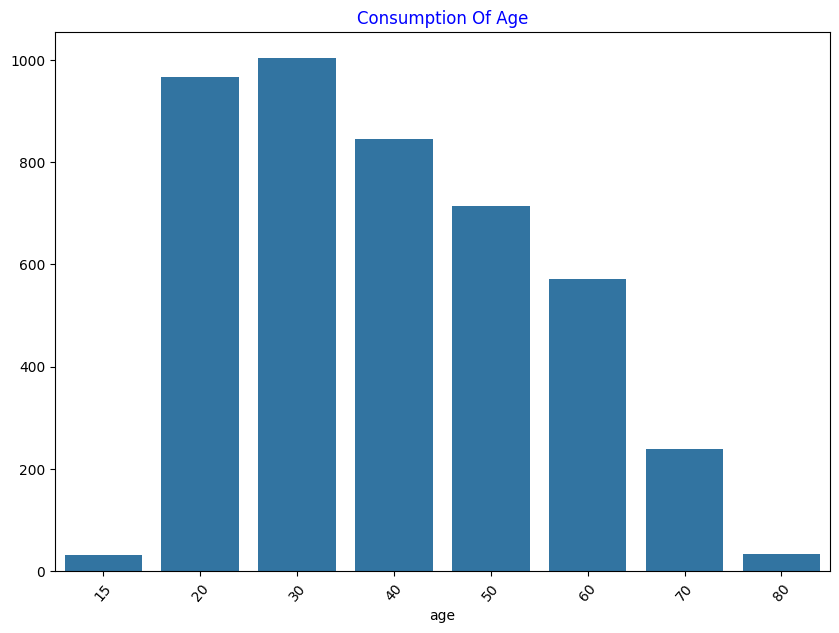

In [8]:
# 시각화를 진행하여 소비 인구가 가장 많은 연령을 확인

import seaborn as sns

top = df['age'].value_counts() #age에 존재하는 소비 인구를 각각 연령별로 count 하여 그래프로 표시
plt.figure(figsize=(10,7))
sns.barplot(x=top[:20].index,y=top[:20].values)
plt.xticks(rotation=50)
plt.title('Consumption Of Age',color = 'blue')

상단의 그래프를 통해 확인하면 신용 및 체크카드에 대해서는 15세 ~ 20세 연령대의 사용 비율이 많지 않기 때문에 결측치로 제거하고 확인하면 대부분 20, 30, 40대의 소비가 주를 이루는 것을 확인 가능하다.

주를 이루는 20, 30, 40대를 기준으로 dataframe을 재구성하여 확인하면 하단과 같이 처리가 가능하다

Text(0.5, 1.0, 'Top Consumption Of Age')

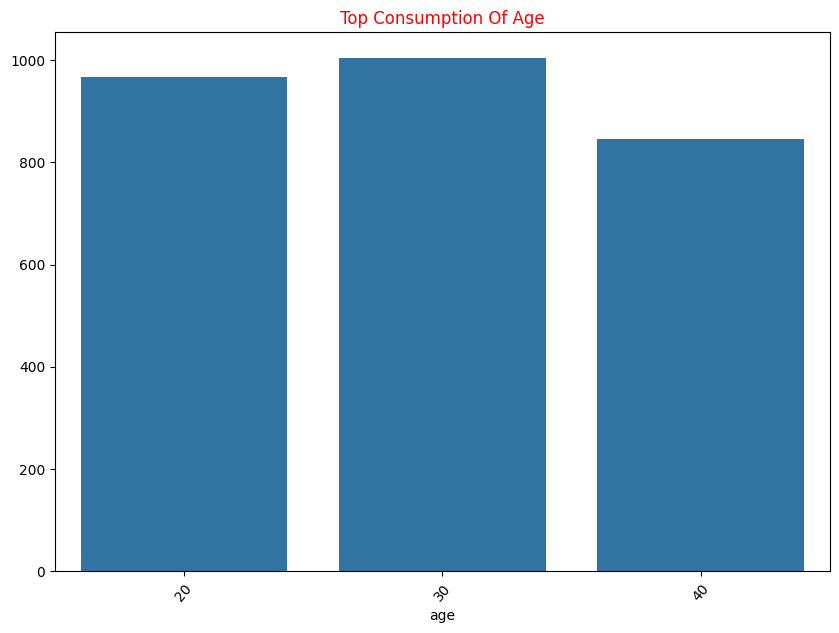

In [9]:
df = df[(df["age"] >= 20) & (df["age"] <= 40)] #20 ~ 40대만 선택하여 상단과 같은 막대 plot 그림
top = df['age'].value_counts() # 각 age에 해당하는 데이터 count
plt.figure(figsize=(10,7))
sns.barplot(x=top[:20].index, y=top[:20].values) 
plt.xticks(rotation=50)
plt.title('Top Consumption Of Age', color='red')

# 5. 변수 간 상관관계 확인을 통한 변수 선택 

선정된 20  ~ 40대 소비인구의 유형을 분석하기 위해 세부적인 속성의 선택을 위해 heatmap과 boxplot을 통하여 관계 여부를 확인하고 선택을 진행한다.

<Axes: >

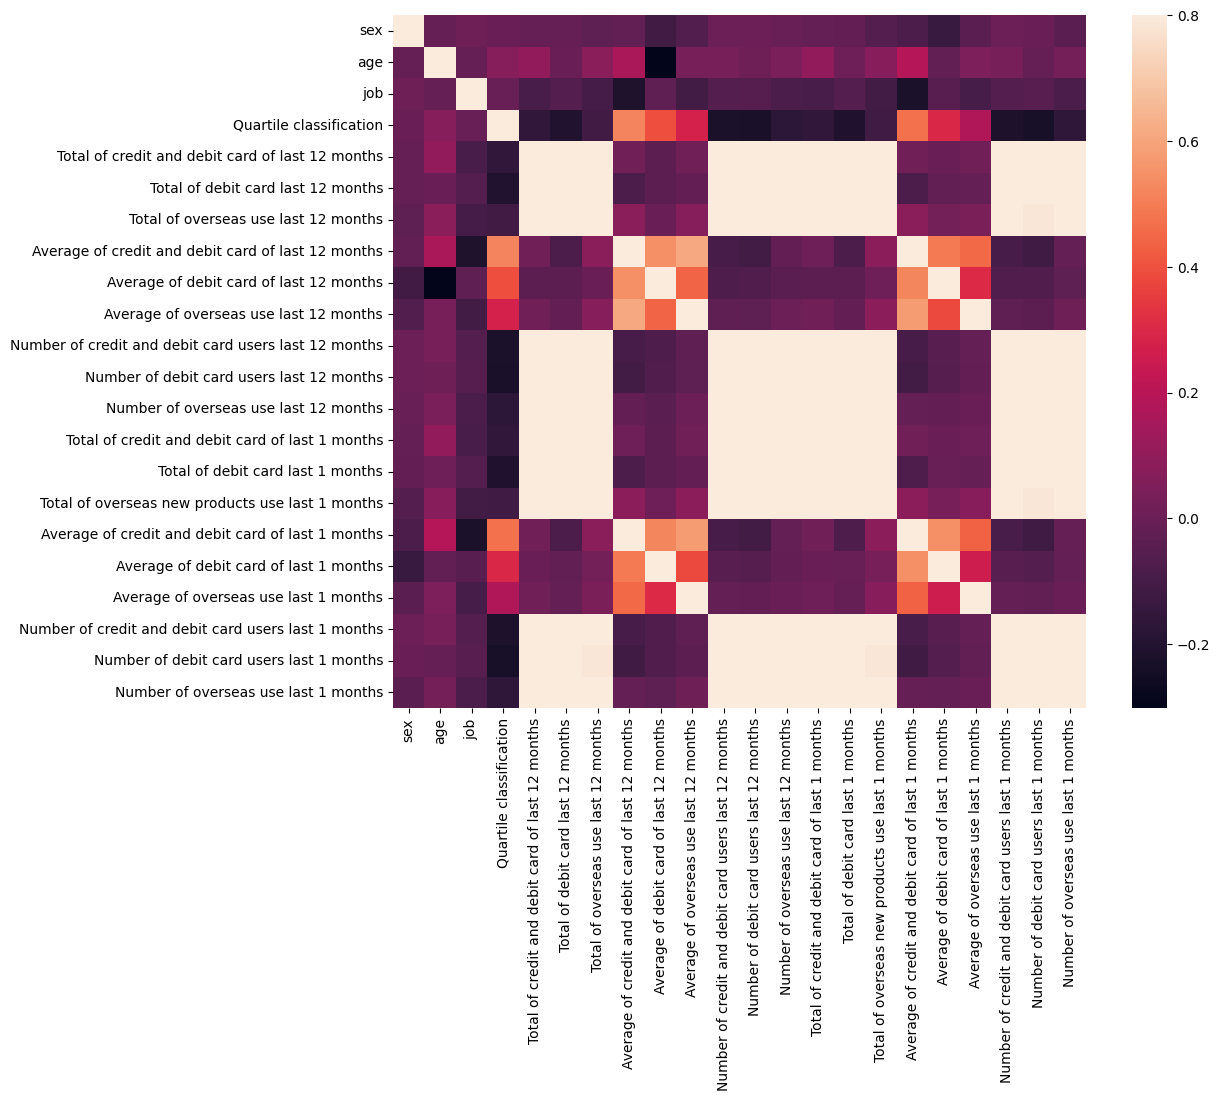

In [10]:
# 20~40 연령대에 존재하는 다른 속성에 어떤 상관관계가 있는지 파악을 진행함

df_modified = df.iloc[:, 4:] # 속성 선택
corrmat = df_modified.corr() # 상관계수 행렬 게산
f, ax = plt.subplots(figsize=(12, 9)) # 그래프 사이즈 지정
sns.heatmap(corrmat, vmax=.8, square=True) #heatmap을 그림

<Axes: xlabel='Number of credit and debit card users last 1 months'>

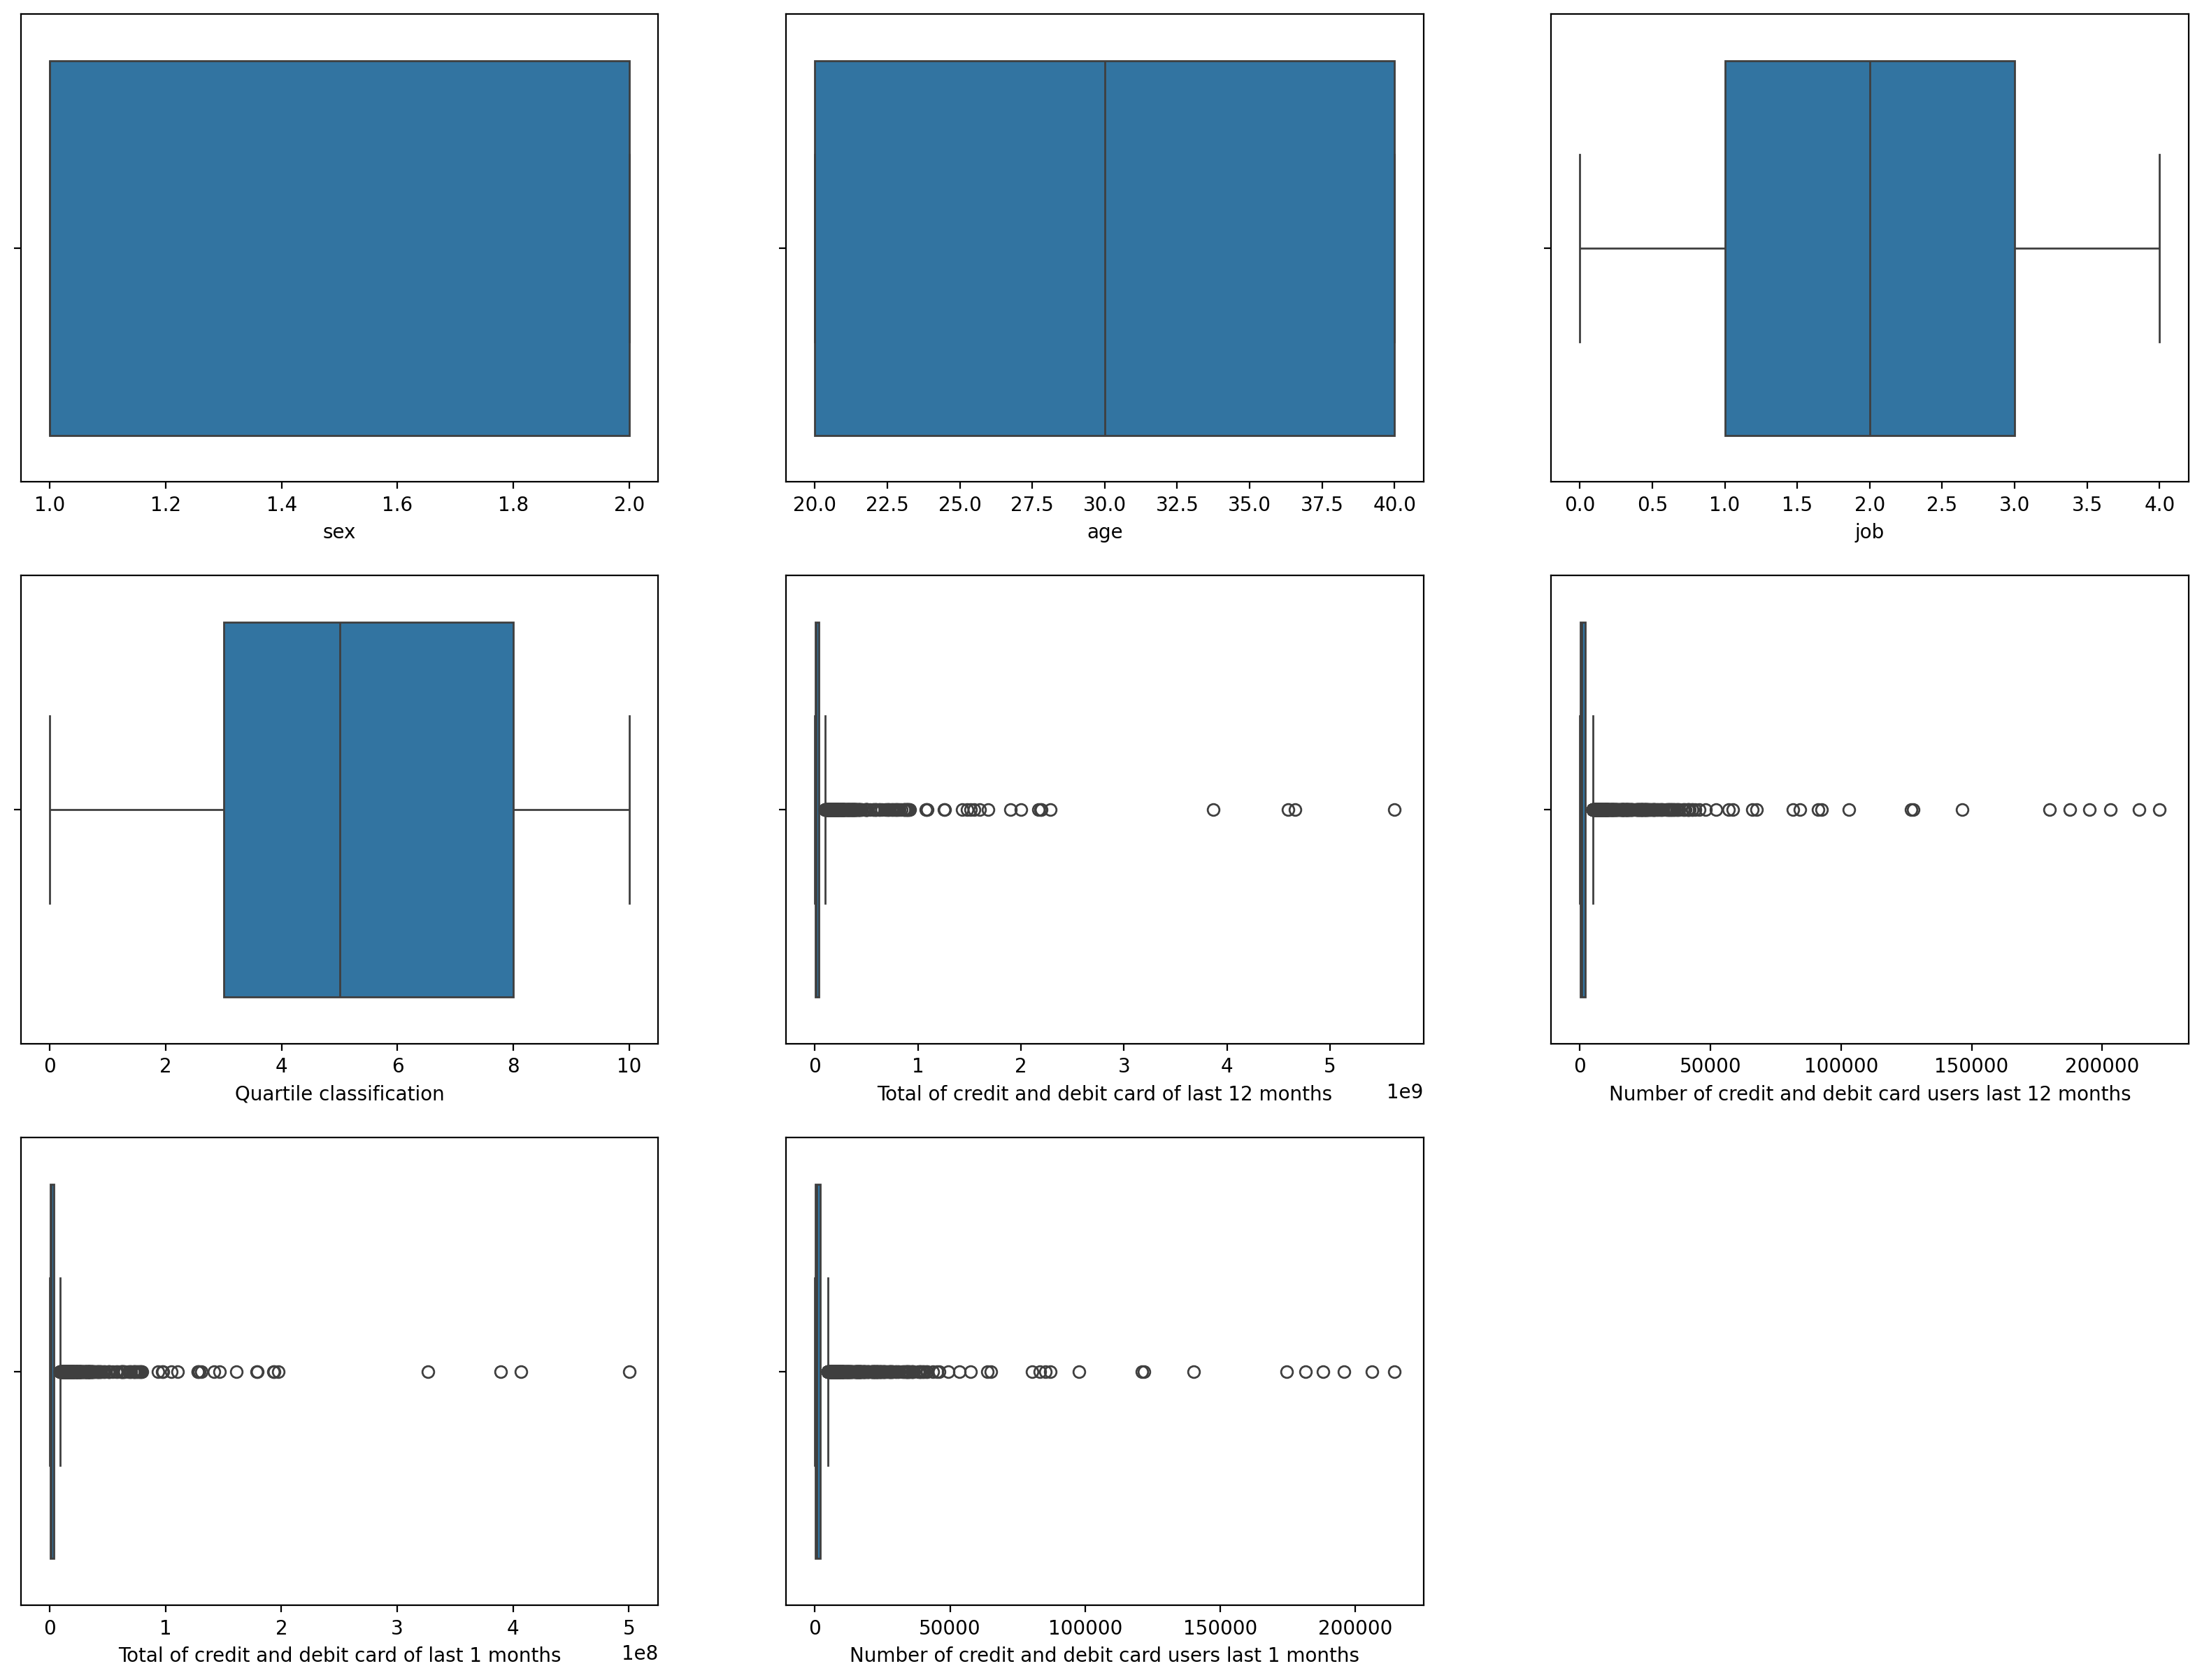

In [11]:
# 상자그림 그리기 (각각의 속성을 선택하여 plt에 표기함)

plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'sex', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'age', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'job', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'Quartile classification', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'Total of credit and debit card of last 12 months', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'Number of credit and debit card users last 12 months', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'Total of credit and debit card of last 1 months', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'Number of credit and debit card users last 1 months', data = df)

1. heapmap을 이용한 표를 보면 각 속성에 따라 어떤 상관관계를 가지는지에 대해서 관계가 정비례이면 색상이 밝고, 관계가 반비례이면 색상이 어둡게 표시가 된다.

이번 데이터에서 활용할 데이터를 보면 sex, age, job에 따른 Total of credit and debit card of last 1 month와의 관계를 보면 나이에는 관계가 존재하지만 sex와 job에 따른 상관관계는 그리 크기 않은 것을 확인 가능하다. 

2. 상자 그림을 통해 데이터의 분포를 확인하면 실질적으로 필요한 데이터들만 추려 분포를 확인하면 평균의 위치와 이상치의 여부를 확인 가능하다.


우선 클러스터링의 분석은 20 ~ 40대에 해당하는 인구들의 sex와 job에 따른 Total of credit and debit card of last 1 months와 Total of credit and debit card of last 12 months의 분석을 진행하는 것으로 정한다.

# 6. K-means 클러스터링 적용

위에서 선정한 속성인 sex, age, job, Total of credit and debit card of last 1 month, Total of credit and debit card of last 12 months를 통해 K-means 클러스터링을 진행한다.

이후 목표변수를 지정하여 인코딩을 진행하고 KMean 클러스터링을 군집을 지정하여 진행한다

- 1. 데이터 정수로 인코딩 후 목표 지정 및 할당

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder() # 문자열 데이터를 정수로 인코딩

X = df.loc[:, ('job', 'age', 'sex', 'Total of credit and debit card of last 1 months', 'Total of credit and debit card of last 12 months')] # 속성값 선택 후 값을 x에 지정

y = df['age'] # 클러스터링 목표 변수를 지정

X['age'] = le.fit_transform(X['age']) # 목표 변수를 인코딩 할당

y = le.transform(y) # y에 목표 변수를 인코딩 진행

- 2. KMeans에 군집 갯수 및 시드값 지정 후 알고리즘 알고리즘 초기화 및 군집 학습, 예측 진행 후 결과 출력

In [13]:
from sklearn.cluster import KMeans

nclusters = 3 # 클러스터 갯수 지정
seed = 0 # 시드 값 지정

km = KMeans(n_clusters=nclusters, random_state=seed) #KMeans 알고리즘에 클러스터 3개, seed 0으로 지정 및 초기화
km.fit(X) #위에서 목표 번수를 지정한 dataframe을 전달하여 클러스터링 학습 진행

y_cluster_kmeans = km.predict(X) # 학습한 모델을 통해 군집 예측 진행
y_cluster_kmeans # 예측 결과 출력

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

- 3. 학습된 모델의 실루엣 점수를 출력

In [14]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans) #모델의 실루엣 점수를 출력함
score

# 이 스코어가 1에 가까울 수록 잘 된걸 의미한다 (잘 구분, 잘 모임)
# 해당 모델의 실루엣 점수는 0.927....로 군집화가 잘 된 것을 확인 가능하다.

0.927886013834718

- 4. WCSS(제곱합)을 측정하여 엘보우 방법으로 적절한 군집 갯수 정함

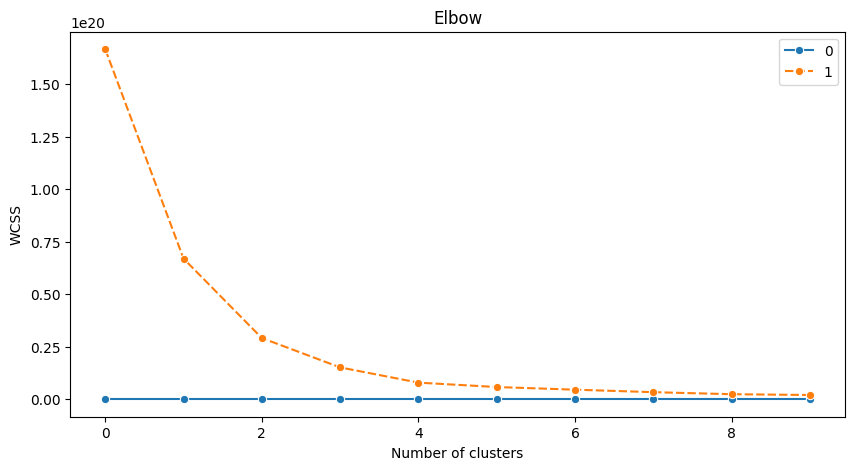

In [15]:
from sklearn.cluster import KMeans
wcss = [] # WCSS 즉 클러스터 내의 제곱합을 통한 중심까지의 평균 거리 제곱을 측정하는 방식으로 측정하여 저장함 (엘보우 방법을 통해 해당 모델에 적합한 군집 갯수를 확인하기 위함)

for i in range(1, 11): # 1 ~ 10까지의 군집 갯수에 대해 반복
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # 모델 설정 군집수 1 ~ 10까지 초기 중심 설정을 k-means++로 지정 및 random_state를 42로 지정
    kmeans.fit(X) # 모델 학습
    wcss.append(kmeans.inertia_)

# 엘보우 기법 즉 WCSS를 그래프화 시켜서 K값을 확인하기 위해 시각화 진행
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

상단의 그래프를 확인하면 3개의 군집이 가장 적절함을 확인 가능하다.
군집의 적절성은 육안으로 선택하여 사용하는 방법밖에 없다.

# 7. 클러스터링 수행

상단에서 선택한 군집의 갯수를 적용하여 기존의 학습이 완료된 모델을 사용하여 예측을 진행하여 선택한 속성에 따른 클러스터링의 결과를 그래프로 확인하여 분석을 진행한다.

- 1. sex, Total of credit and debit card of last 1 months(1달 사용 금액)의 관계

- 2. age, Total of credit and debit card of last 1 months(1달 사용 금액)의 관계

- 3. job, Total of credit and debit card of last 1 months(1달 사용 금액)의 관계

으로 총 5가지의 클러스터링 결과를 확인

1. sex, Total of credit and debit card of last 1 months(1달 사용 금액)의 관계

=================================================================================

분석 결과 : 소비 금액은 20대와 유의미한 차이를 보이지 않으나 30대의 경우부터 남성의 소비가 눈에 띄게 많은 것을 확인 가능하며 40대의 경우에도 역시 남성의 소비가 높은 것을 확인 가능하다. 수요가 남성이 소비 금액이 더 높기 때문에 사업 아이템을 선정할 경우 남성을 타겟으로 하는 사업이 여성에 비해 많은 수익을 가져올 확률이 높다고 분석된다. 하지만 이 또한 아이템에 따라서 오히려 소비 비율이 여성이 높은 경우도 있기에 고민을 해볼 필요성이 있다.

=================================================================================

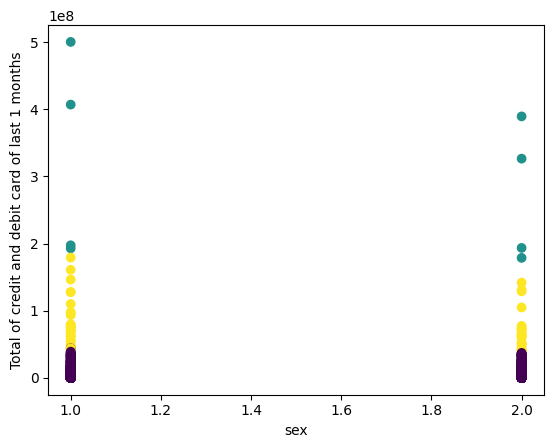

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3) # 군집을 3으로 세팅
kmeans.fit(X)  # 데이터 학습
labels = kmeans.predict(X) # 예측 진행
plt.scatter(df['sex'],df['Total of credit and debit card of last 1 months'],c = labels) #sex와 Total of credit and debit card of last 1 months 선택
plt.xlabel('sex')
plt.ylabel('Total of credit and debit card of last 1 months')
plt.show()

2. age, Total of credit and debit card of last 1 months(1달 사용 금액)의 관계

=================================================================================

분석 결과 : 20대의 경우에는 비경제활동 인구가 많은 만큼 큰 금액을 사용하지는 않음 하지만 소비 인구는 많으며, 30대, 40대 순으로 소비 금액이 점점 커지는 것을 확인 가능함.

만약 사업아이템을 선정한다면 20대에게는 오락성 및 유흥에 대한 저렴한 아이템을 통해 많은 수요를 이끄는 방법이 좋고 30대와 40대는 소비 금액이 크기 때문에 생활에 가장 필요한 물품 혹은 해당 연령대를 대상으로 한 큰 금액의 지출이 필요한 사업 아이템을 선정하면 도움이 될 것으로 판단된다.

=================================================================================

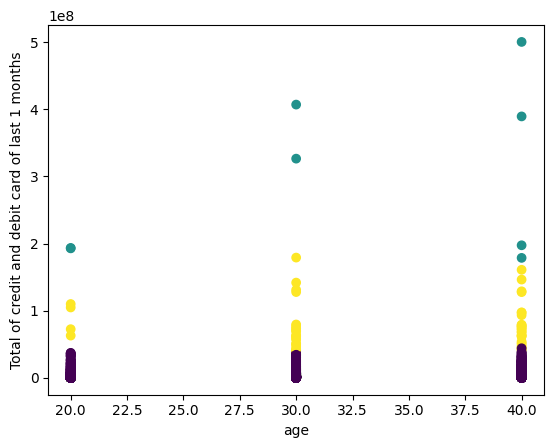

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3) # 군집을 3으로 세팅
kmeans.fit(X)  # 데이터 학습
labels = kmeans.predict(X) # 예측 진행
plt.scatter(df['age'],df['Total of credit and debit card of last 1 months'],c = labels) # age와 Total of credit and debit card of last 1 months 선택
plt.xlabel('age')
plt.ylabel('Total of credit and debit card of last 1 months')
plt.show()

3. job, Total of credit and debit card of last 1 months(1달 사용 금액)의 관계

=================================================================================

- 직업 종류 구분

0 : 전체, 1 : 자영업자, 2 : 급여소득자(상장), 3 : 급여소득자(비상장), 4 : 비경제활동인구

분석 결과 : 연령을 구분하지 않고 보면, 소비의 금액에 따라서 급여소득자(비상장) > 비경제활동인구 > 자영업자 > 급여소득자(상장) 순으로 비교가 가능함을 확인 가능하다. 

즉, 비상장은 중소기업을 뜻하고 상장은 중견,대기업을 뜻하는데 연령에 따라 차이를 보이겠지만 대체적으로 중소기업 근로자의 소비가 가장 컸으며 비경제활동인구의 소비액 그리고 자영업자, 중견/대기업의 근로자 소비액 순으로 비교가 가능하였기에 사업 아이템을 선정할 경우 회사 혹은 비경제활동인구를 목표로 정하여 사업을 구상하면 이점이 있을 것으로 보인다.

=================================================================================

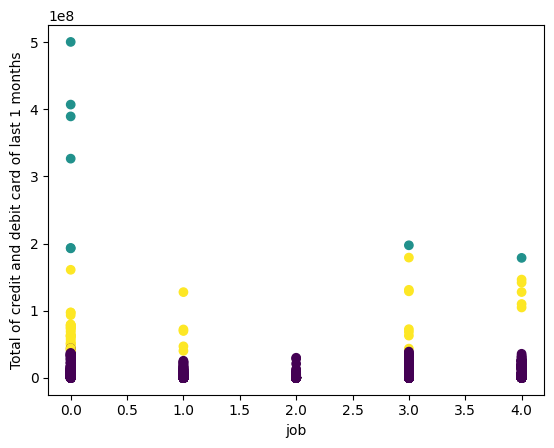

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3) # 군집을 3으로 세팅
kmeans.fit(X)  # 데이터 학습
labels = kmeans.predict(X) # 예측 진행
plt.scatter(df['job'],df['Total of credit and debit card of last 1 months'],c = labels) # job과 Total of credit and debit card of last 1 months 선택
plt.xlabel('job')
plt.ylabel('Total of credit and debit card of last 1 months')
plt.show()

# 8. 최종 모델의 적합도에 대한 수치 확인

In [19]:
labels = kmeans.labels_ # kmean 모델의 분류 결과

correct_labels = sum(y == labels) # 기존의 데이터의 분류값

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size)) # 기존의 데이터와 Kmean 모델의 분류 결과를 비교하여 label된 갯수 확인

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size))) # 정확도를 측정하여 출력

# 2816개 중 981개가 labeled가 되었다
# 따라서 정답은 35% 임를 확인 가능하다.

# 따라서 이런 우리가 정한 장르에 대한 기준이 아닌, 다른 기준이 있음을 확인 가능하다. (다른 특성이 있다)

Result: 991 out of 2816 samples were correctly labeled.
Accuracy score: 0.35


# 9. 최종 평가

인천광역시의 경우 20는 성별 상관없이 소비 금액이 크지는 않지만 소액의 소비 인구가 많았으며, 30대와 40대는 (남성)비경제활동인구와 (남성)급여소득자(상장)의 경우에 가장 소비 금액이 큰 것이 확인되었기 때문에 이 대상들을 고객으로 생각하고 사업 아이템을 이들을 대상으로 선정하여 구상하고 시작하면 보다 높은 수익을 가져올 것으로 판단된다.

예측과 달리 연령과 성별, 그리고 직업에 따라 소비 데이터를 확인하면 해당 지역에 가장 소비가 많은 대상을 타겟으로 하여 사업 아이템 선정에 도움을 받을 수 있다는 것은 확실하나, 해당 클러스터링을 통해서 확인 가능한 사실은 20, 30, 40대의 직업에 따라 소비 비중이 다르며 확연한 차이를 보인다는 것이다. 

문제는 소비의 연령대를 20, 30, 40으로 나누어 세부적인 성별, 직업에 인과관계가 확실하지 않아 분석이 예상처럼 쉽지 않았다는 점이다.

이를 가지고 총 소비금액에 대해서는 연령, 성별, 직업에 대한 관련 데이터 만으로는 설명이 불가한 인과관계가 많으며 추가적인 데이터가 필요하다는 사실을 확인 가능하다.

모델의 실루엣 점수가 35%임을 확인하면 추가적인 데이터를 통해 새로운 관계를 찾아서 분석할 필요성이 있음을 알 수 있다.